In [31]:
# import online dataset which is perfect for one variable linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [32]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [34]:
w1 = ((X - X.mean())*(y - y.mean())).sum()/((X - X.mean())**2).sum()
w1

9.775803390787473

In [35]:
b = y.mean() - w1*X.mean()
b

2.4836734053731817

In [36]:
(((X*w1+b) - y)**2).sum() / len(X)

28.882730509245462

In [37]:
#  (1/N)Σ(w1*X +b - y)^2 = (w1*X+b)^2 - 2(w1*X+b)*y + y^2 
#                        = w1^2*X^2 + 2*w1*X*b + b^2 - 2*w1*X*y - 2*b*y + y^2
#                       d/dw1 = 2*w1*X^2 + 2*X*b - 2*X*y 
#                       d/db = 2*b + 2*w1*X - 2*y 


In [38]:
dw1 = w1**2*X**2 + 2*w1*X*b + b**2 - 2*w1*X*y - 2*b*y + y**2
dw1 = dw1.sum()
dw1

722.0682627311351

In [39]:
db = 2*b + 2*w1*X - 2*y
db = db.sum()
db

-8.526512829121202e-14

In [40]:
def backpropagation(X, y, w1, b, learning_rate):
    dw1 = 2*w1*X**2 + 2*X*b - 2*X*y
    dw1 = dw1.sum()
    db = 2*b + 2*w1*X - 2*y_train_train_train_train_train
    db = db.sum()
    w1 = w1 - learning_rate*dw1
    b = b - learning_rate*db
    return w1, b, dw1, db

In [41]:
def forward(X, w1, b):
    return w1*X + b

In [42]:
def initialize(X,y):
    w1 = ((X - X.mean())*(y - y.mean())).sum()/((X - X.mean())**2).sum()
    return w1 , y.mean() - w1*X.mean()

In [43]:
import time

In [44]:
def r_test(X, y, w1, b):
    r2 = 1 - (((X*w1+b) - y)**2).sum() / ((y - y.mean())**2).sum()
    return r2

In [45]:
w1,b = initialize(X,y)
print(w1,b)
error_his = []

for i in range(100):
    print("Epoch ",i+1)
    error_his .append(((forward(X,w1,b) - y)**2).sum() / len(X))
    print(f"Error: {'%0.8f' % error_his[-1]}")
    w1, b, dw1, db = backpropagation(X, y, w1, b, 0.001)
    #print(f"{'%0.8f' % w1}X+{'%0.8f' % b}")
    #print(f"dw1: {'%0.8f' % dw1} db: {'%0.8f' % db}")
    print(f"w1= {'%0.8f' % w1} b= {'%0.8f' % b}")
    print("R2: ",r_test(X,y,w1,b))
    
    

9.775803390787473 2.4836734053731817
Epoch  1
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  2
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  3
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  4
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  5
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  6
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  7
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  8
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  9
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  10
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  11
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.9529481969048356
Epoch  12
Error: 28.88273051
w1= 9.77580339 b= 2.48367341
R2:  0.95294

In [46]:
error_his

[28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509245462,
 28.882730509

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_m = X.reshape(-1,1)
regressor.fit(X_m, y)


LinearRegression()

In [48]:
regressor.coef_ , regressor.intercept_

(array([9.77580339]), 2.48367340537321)

In [50]:
r_test(X,y,regressor.coef_[0],regressor.intercept_) - r_test(X,y,w1,b)

0.0

In [51]:
#  (1/N)Σ(w1*X +b - y)^2 + alpha*w1^2 + alpha*b^2 = (w1*X+b)^2 - 2(w1*X+b)*y + y^2 
#                        = w1^2*X^2 + 2*w1*X*b + b^2 - 2*w1*X*y - 2*b*y + y^2 + w1^2*alpha + b^2*alpha
#                       d/dw1 = 2*w1*X^2 + 2*X*b - 2*X*y + 2*w1*alpha
#                       d/db = 2*b + 2*w1*X - 2*y + 2*b*alpha

In [52]:
def backpropagation_ridge(X, y, w1, b, learning_rate, alpha):
    #2*w1*X**2 + 2*X*b - 2*X*y old
    dw1 = 2*w1*X**2 + 2*X*b - 2*X*y + alpha*2*w1
    dw1 = dw1.sum()
    db = 2*b + 2*w1*X - 2*y + alpha*2*b
    db = db.sum()
    w1 = w1 - learning_rate*dw1
    b = b - learning_rate*db
    return w1, b, dw1, db

In [53]:
# Ridge regression
w1,b = initialize(X,y)
print(w1,b)
error_his = []
for i in range(100):
    print("Epoch ",i+1)
    error_his .append(((forward(X,w1,b) - y)**2).sum() / len(X))
    print(f"Error: {'%0.8f' % error_his[-1]}")
    w1, b, dw1, db = backpropagation_ridge(X, y, w1, b, 0.001,1)
    w1 = w1 - 0.01*w1
    print(f"w1= {'%0.8f' % w1} b= {'%0.8f' % b}")
    print("R2: ",r_test(X,y,w1,b))

9.775803390787473 2.4836734053731817
Epoch  1
Error: 28.88273051
w1= 9.19414309 b= 2.35948974
R2:  0.9345246660107281
Epoch  2
Error: 40.19200758
w1= 9.57740321 b= 2.39348850
R2:  0.9506394462870116
Epoch  3
Error: 30.29995615
w1= 9.33673591 b= 2.32804241
R2:  0.9419815488948352
Epoch  4
Error: 35.61460300
w1= 9.49880249 b= 2.32945215
R2:  0.9483067907045674
Epoch  5
Error: 31.73185585
w1= 9.40025022 b= 2.29010703
R2:  0.944521992899438
Epoch  6
Error: 34.05515247
w1= 9.46972821 b= 2.27939362
R2:  0.947091356499694
Epoch  7
Error: 32.47794965
w1= 9.43028669 b= 2.25234037
R2:  0.9454799864886098
Epoch  8
Error: 33.46708849
w1= 9.46089761 b= 2.23787649
R2:  0.9465388803312538
Epoch  9
Error: 32.81708692
w1= 9.44593765 b= 2.21718790
R2:  0.9458592168466767
Epoch  10
Error: 33.23429808
w1= 9.46013519 b= 2.20231714
R2:  0.9462975146798435
Epoch  11
Error: 32.96524913
w1= 9.45522169 b= 2.18537554
R2:  0.9460111470550601
Epoch  12
Error: 33.14103578
w1= 9.46240208 b= 2.17135943
R2:  0.9461921

In [54]:
from sklearn.linear_model import Ridge
r_regressor = Ridge(alpha=1)
X_m = X.reshape(-1,1)
r_regressor.fit(X_m, y)
r_regressor.coef_ , r_regressor.intercept_

(array([9.71233503]), 2.8017768382562878)

In [59]:
r_test(X,y,r_regressor.coef_[0],r_regressor.intercept_)

0.9529080290200403

In [60]:
regressor.coef_[0],regressor.intercept_

(9.775803390787468, 2.48367340537321)

In [61]:
r_test(X,y,regressor.coef_[0],regressor.intercept_)

0.9529481969048356

In [62]:
r_test(X,y,regressor.coef_[0],regressor.intercept_)-r_test(X,y,r_regressor.coef_[0],r_regressor.intercept_)

4.0167884795216935e-05

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameters = {'alpha':[i*0.1 for i in range(0,200)]}
r_regressor = Ridge()
clf = GridSearchCV(r_regressor, parameters)
clf.fit(X_m, y)
clf.best_params_, clf.best_score_


({'alpha': 0.0}, 0.9180771341891051)

In [73]:
[i*0.1 for i in range(0,200)]

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0,
 2.1,
 2.2,
 2.3000000000000003,
 2.4000000000000004,
 2.5,
 2.6,
 2.7,
 2.8000000000000003,
 2.9000000000000004,
 3.0,
 3.1,
 3.2,
 3.3000000000000003,
 3.4000000000000004,
 3.5,
 3.6,
 3.7,
 3.8000000000000003,
 3.9000000000000004,
 4.0,
 4.1000000000000005,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6000000000000005,
 4.7,
 4.800000000000001,
 4.9,
 5.0,
 5.1000000000000005,
 5.2,
 5.300000000000001,
 5.4,
 5.5,
 5.6000000000000005,
 5.7,
 5.800000000000001,
 5.9,
 6.0,
 6.1000000000000005,
 6.2,
 6.300000000000001,
 6.4,
 6.5,
 6.6000000000000005,
 6.7,
 6.800000000000001,
 6.9,
 7.0,
 7.1000000000000005,
 7.2,
 7.300000000000001,
 7.4,
 7.5,
 7.6000000000000005,
 7.7,
 7.800000000000001,
 7.9,
 8.0,
 8.1,
 8.200000000000001,
 8.3,
 8.4,
 8.5,
 8.6,
 8.700000000000001,


In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [116]:
# Split the data
X_train, y_train = X_m, X_m**2-50

In [117]:
# Linear Regression (No hyperparameters to tune, just demonstrating the process)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_l = linear_reg.predict(X_train)
linear_mse = mean_squared_error(y_train, y_pred_l)
print(f'Best Linear Regression MSE: {linear_mse}')

# Lasso Regression
lasso_reg = Lasso()
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(lasso_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
y_pred_la = best_lasso_model.predict(X_train)
lasso_mse = mean_squared_error(y_train, y_pred_la)
print(f'Best Lasso Regression MSE: {lasso_mse}')

# Ridge Regression
ridge_reg = Ridge()
params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(ridge_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

best_ridge_model = grid_search_ridge.best_estimator_
y_pred_r = best_ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, y_pred_r)
print(f'Best Ridge Regression MSE: {ridge_mse}')


Best Linear Regression MSE: 25.52359647621586
Best Lasso Regression MSE: 25.523612813266205
Best Ridge Regression MSE: 25.523599339158306


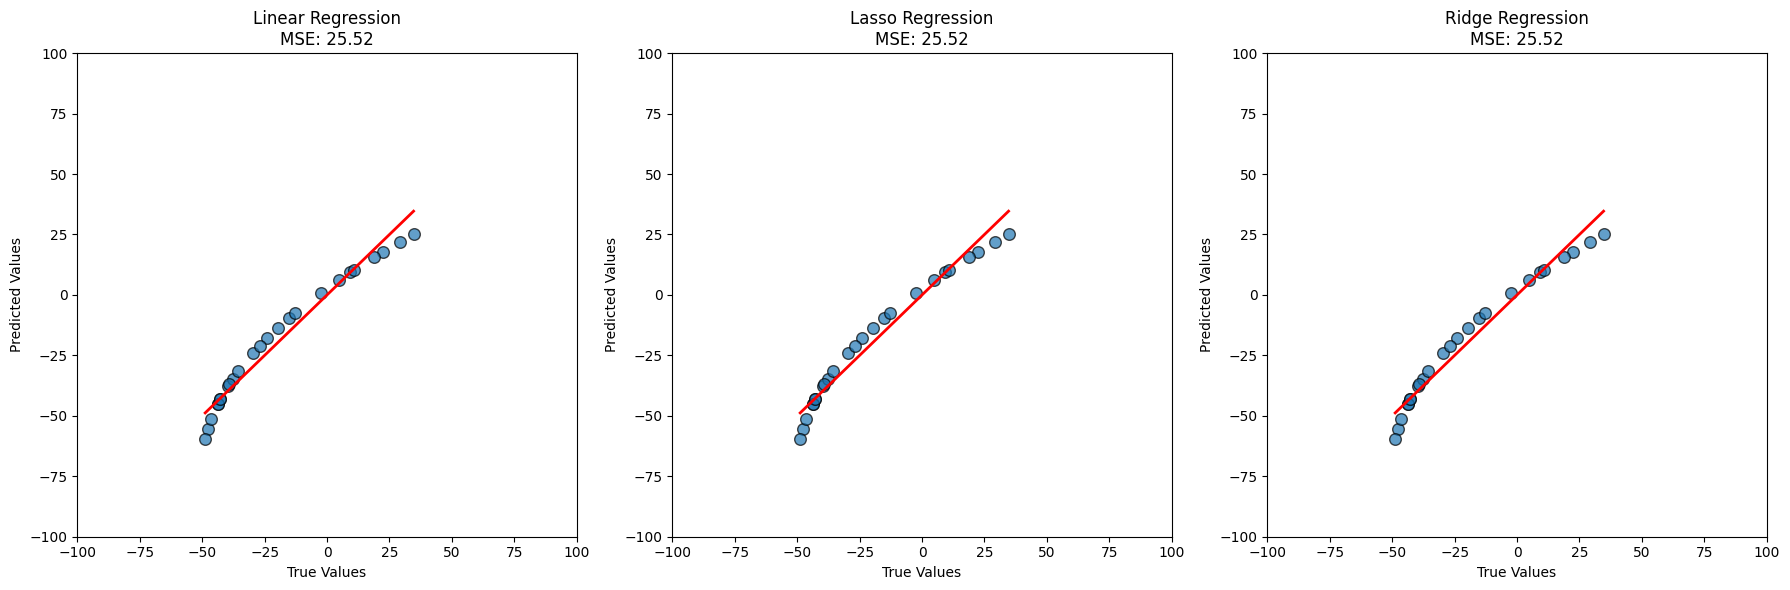

In [120]:
# Plotting
plt.figure(figsize=(18, 6))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_l, edgecolor='k', alpha=0.7, s=70)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression\nMSE: {linear_mse:.2f}')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
# Lasso Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_train, y_pred_la, edgecolor='k', alpha=0.7, s=70)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Lasso Regression\nMSE: {lasso_mse:.2f}')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
# Ridge Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_train, y_pred_r, edgecolor='k', alpha=0.7, s=70)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Ridge Regression\nMSE: {ridge_mse:.2f}')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.tight_layout()
plt.show()

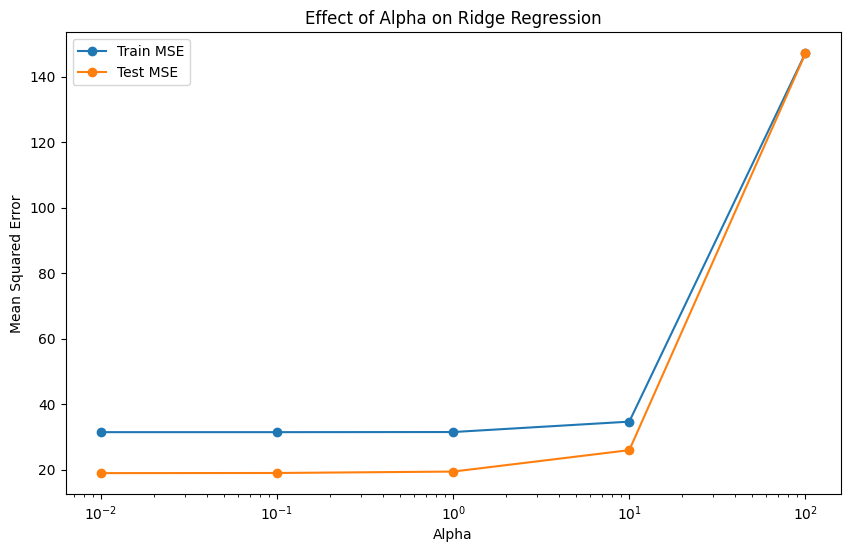

In [121]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_m, y, test_size=0.2, random_state=42)

# Different alpha values for Ridge Regression
alpha_values = [0.01, 0.1, 1.0, 10.0, 100.0]
train_errors = []
test_errors = []

# Train and evaluate Ridge Regression for each alpha value
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_errors, label='Train MSE', marker='o')
plt.plot(alpha_values, test_errors, label='Test MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Alpha on Ridge Regression')
plt.legend()
plt.show()